## Simulation Study of Gaussian and t-copula
Exercise: Populate the table below with default probabilities (in percent, 2 decimals).
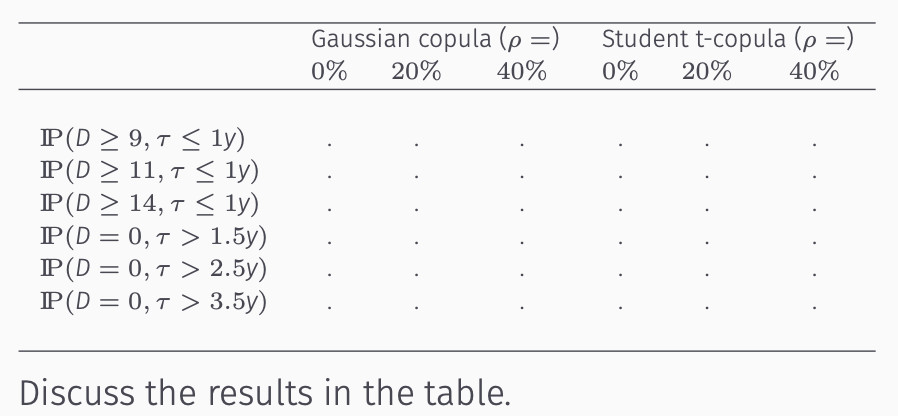

In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.stats import norm
from scipy.stats import t

## Parameter Set Up

In [2]:
rhos= [0, 0.2, 0.4]
corr_0= np.zeros ([30,30])
np.fill_diagonal(corr_0,1)
corr= np.zeros([30,30])


## Gausian Copula

In [3]:
for rho in rhos:
    corr.fill(rho)
    np.fill_diagonal(corr,1)
    cov=np.dot(np.dot(corr_0,corr),corr_0)
    Lower_T=scipy.linalg.cholesky(cov, lower= True)
    
    num_of_simulation=250000
    y=[]
    means=[0]*30

    for i in range (num_of_simulation):
        z=np.random.normal(0,1,30)
        sam_eq_mean= Lower_T.dot(z)
        s= (sam_eq_mean.transpose()+means)
        x= norm.cdf(s)
        y.append(np.round(-(np.log(x))/0.12,2))

    z=np.array(y)
    
    defaults =[9,11,14]
    
    for each_default in defaults:
        count=0
        for each_path in z:
            if len ( [1 for k in each_path if k <=1]) >=each_default:
                count = count+1
        PD= "{:.2%}".format(count/num_of_simulation)
        print ('For Correlation {}, the probability of {} or more defaults within the first year is {}'.
                   format (rho, each_default, PD)) 
        
    years= [1.5,2.5,3.5]
    
    for each_year in years:
        count2 =0
        for each_path in z:
            if len ( [1 for k in each_path if k > each_year]) ==30:
                count2 = count2+1
        PD2 = "{:.2%}".format(count2/num_of_simulation)
        print ('For Correlation {}, the probability of zero default within the first {} year is {}'.
                   format (rho, each_year, PD2)) 

For Correlation 0, the probability of 9 or more defaults within the first year is 0.47%
For Correlation 0, the probability of 11 or more defaults within the first year is 0.03%
For Correlation 0, the probability of 14 or more defaults within the first year is 0.00%
For Correlation 0, the probability of zero default within the first 1.5 year is 0.44%
For Correlation 0, the probability of zero default within the first 2.5 year is 0.01%
For Correlation 0, the probability of zero default within the first 3.5 year is 0.00%
For Correlation 0.2, the probability of 9 or more defaults within the first year is 7.94%
For Correlation 0.2, the probability of 11 or more defaults within the first year is 4.00%
For Correlation 0.2, the probability of 14 or more defaults within the first year is 1.29%
For Correlation 0.2, the probability of zero default within the first 1.5 year is 8.29%
For Correlation 0.2, the probability of zero default within the first 2.5 year is 2.51%
For Correlation 0.2, the pro

## Student-t copula

In [5]:
for rho in rhos:
    corr.fill(rho)
    np.fill_diagonal(corr,1)
    cov=np.dot(np.dot(corr_0,corr),corr_0)
    Lower_T=scipy.linalg.cholesky(cov, lower= True)
    
    num_of_simulation=250000
    y=[]
    means=[0]*30

    for i in range (num_of_simulation):
        z=np.random.normal(0,1,30)
        sam_eq_mean= Lower_T.dot(z)
        s= (sam_eq_mean.transpose()+means)
        Y = np.random.chisquare(4, 30)
        T= s* np.sqrt(4)/np.sqrt(Y)
        x= t.cdf(T,4)
        y.append(np.round(-(np.log(x))/0.12,2))

    z=np.array(y)
    
    defaults =[9,11,14]
    
    for each_default in defaults:
        count=0
        for each_path in z:
            if len ( [1 for k in each_path if k <=1]) >=each_default:
                count = count+1
        PD= "{:.2%}".format(count/num_of_simulation)
        print ('For Correlation {}, the probability of {} or more defaults within the first year is {}'.
                   format (rho, each_default, PD)) 
        
    years= [1.5,2.5,3.5]
    
    for each_year in years:
        count2 =0
        for each_path in z:
            if len ( [1 for k in each_path if k > each_year]) ==30:
                count2 = count2+1
        PD2 = "{:.2%}".format(count2/num_of_simulation)
        print ('For Correlation {}, the probability of zero default within the first {} year is {}'.
                   format (rho, each_year, PD2)) 

For Correlation 0, the probability of 9 or more defaults within the first year is 0.47%
For Correlation 0, the probability of 11 or more defaults within the first year is 0.02%
For Correlation 0, the probability of 14 or more defaults within the first year is 0.00%
For Correlation 0, the probability of zero default within the first 1.5 year is 0.43%
For Correlation 0, the probability of zero default within the first 2.5 year is 0.01%
For Correlation 0, the probability of zero default within the first 3.5 year is 0.00%
For Correlation 0.2, the probability of 9 or more defaults within the first year is 6.90%
For Correlation 0.2, the probability of 11 or more defaults within the first year is 3.10%
For Correlation 0.2, the probability of 14 or more defaults within the first year is 0.86%
For Correlation 0.2, the probability of zero default within the first 1.5 year is 7.16%
For Correlation 0.2, the probability of zero default within the first 2.5 year is 2.28%
For Correlation 0.2, the pro

In [6]:
import numpy as np
import random
import scipy.linalg
from scipy.stats import norm
from scipy.stats import t

In [7]:
rhos= [0, 0.2, 0.4]
corr_0= np.zeros ([30,30])
np.fill_diagonal(corr_0,1)
corr= np.zeros([30,30])
corr.fill(0.2)
np.fill_diagonal(corr,1)
cov=np.dot(np.dot(corr_0,corr),corr_0)
Lower_T=scipy.linalg.cholesky(cov, lower= True)

In [8]:
num_of_simulation=250000
s=[]
means=[0]*30

for i in range (num_of_simulation):
        z=np.random.normal(0,1,30)
        sam_eq_mean= Lower_T.dot(z)
        s.append (sam_eq_mean+means)

In [9]:
s=np.array(s)
s

array([[ 0.17358714, -2.22157385, -0.76269268, ...,  0.68530416,
         0.04628684,  0.54712192],
       [ 0.39867241,  1.39408934,  1.98544604, ...,  1.97880696,
         1.06062396,  2.19078026],
       [ 0.1231263 ,  0.02090672,  0.57062166, ...,  1.93130926,
         0.70564354, -0.37883335],
       ...,
       [ 1.88242152, -0.10784584,  0.21901055, ..., -0.88134129,
         0.69007885,  0.31252809],
       [-1.65519493, -1.47202513,  0.68980099, ..., -0.36009462,
         0.5798462 , -0.94186385],
       [ 0.03955227, -1.046807  , -1.6252888 , ...,  0.68700491,
        -1.43798392, -0.95451188]])

In [10]:
import pandas as pd
s=pd.DataFrame(s)

In [11]:
s.cov()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.997839,0.199814,0.201341,0.198999,0.197271,0.199673,0.203244,0.199157,0.197918,0.200714,...,0.201544,0.196449,0.200025,0.201868,0.202969,0.200195,0.195636,0.200220,0.198911,0.201536
1,0.199814,0.993820,0.199910,0.198621,0.199963,0.198365,0.198842,0.196570,0.201521,0.199522,...,0.197954,0.195733,0.194633,0.203997,0.199206,0.200361,0.199139,0.199664,0.199656,0.198708
2,0.201341,0.199910,1.001127,0.201483,0.202438,0.198617,0.203614,0.200911,0.202551,0.201245,...,0.200639,0.199581,0.198241,0.200823,0.197925,0.200956,0.197105,0.200015,0.201733,0.200745
3,0.198999,0.198621,0.201483,1.000939,0.200238,0.198806,0.203641,0.197728,0.201677,0.199458,...,0.203117,0.197938,0.196620,0.197150,0.198682,0.200307,0.202347,0.199111,0.201391,0.202409
4,0.197271,0.199963,0.202438,0.200238,1.004232,0.199855,0.203314,0.196504,0.197286,0.201033,...,0.201263,0.199941,0.200878,0.201076,0.202877,0.197729,0.204807,0.199226,0.199138,0.201336
5,0.199673,0.198365,0.198617,0.198806,0.199855,1.000529,0.198757,0.198853,0.199021,0.198388,...,0.196432,0.197846,0.196735,0.200726,0.199928,0.199269,0.196476,0.200202,0.198277,0.199063
6,0.203244,0.198842,0.203614,0.203641,0.203314,0.198757,1.006070,0.200581,0.204103,0.202198,...,0.206435,0.200377,0.200287,0.203854,0.199962,0.203886,0.202294,0.202427,0.202846,0.200802
7,0.199157,0.196570,0.200911,0.197728,0.196504,0.198853,0.200581,0.999416,0.199158,0.200099,...,0.201147,0.196863,0.195305,0.197026,0.201509,0.198672,0.197389,0.197048,0.197670,0.201304
8,0.197918,0.201521,0.202551,0.201677,0.197286,0.199021,0.204103,0.199158,1.005007,0.204156,...,0.201359,0.197858,0.201745,0.205161,0.199175,0.199961,0.203497,0.199960,0.199213,0.198082
9,0.200714,0.199522,0.201245,0.199458,0.201033,0.198388,0.202198,0.200099,0.204156,1.000724,...,0.201327,0.201512,0.198713,0.201797,0.200072,0.201343,0.201363,0.198849,0.198731,0.201071


In [12]:
import seaborn as sns

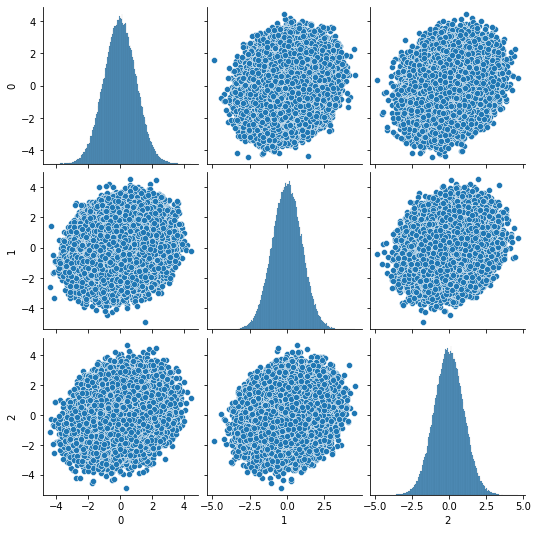

In [13]:
sns.pairplot(s.iloc[:,0:3])
plt.show()

In [14]:
    num_of_simulation=250000
    T=[]
    means=[0]*30

    for i in range (num_of_simulation):
        z=np.random.normal(0,1,30)
        sam_eq_mean= Lower_T.dot(z)
        s= (sam_eq_mean.transpose()+means)
        Y = np.random.chisquare(4, 30)
        T.append(s* np.sqrt(4)/np.sqrt(Y))
        

In [15]:
T=pd.DataFrame(np.array(T))
T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.418407,0.664719,-0.826131,0.198084,4.354354,-0.904960,0.487921,-0.733405,0.167348,0.247860,...,-1.574064,0.789244,0.421424,-4.014120,-0.719431,0.807839,-0.027075,-0.737177,-1.223226,0.001297
1,-0.110628,-1.391873,-0.706329,0.058551,-1.709382,0.074926,-3.057651,-0.227669,-0.045694,-2.145050,...,-1.272354,-1.943357,0.722254,-2.836375,-0.235401,-1.508069,0.375199,-1.666046,1.202560,-1.375808
2,0.360204,0.723856,-0.102147,1.614059,1.529542,1.756942,0.283506,1.803617,-0.146839,3.710702,...,1.590817,2.980293,1.476649,1.658018,3.603382,3.600606,0.844036,3.043376,3.320453,1.052010
3,3.852008,-1.607972,0.554807,0.009117,-0.044676,-0.341217,1.202547,0.653991,-0.398552,-0.774851,...,0.331093,0.812201,1.006943,0.292222,-0.395046,-0.302179,-1.924043,0.628224,-0.743679,-0.279779
4,-0.144271,-1.012026,2.032125,-0.205791,0.279795,-1.024636,-2.755645,0.563923,0.607123,-0.156482,...,-0.682172,-1.354217,-1.254579,-2.159269,0.739140,0.475747,-0.614047,-1.692654,1.591164,-1.241348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1.375444,-0.553401,3.103892,1.146138,4.807507,0.259555,2.252791,1.095626,1.131257,-0.852039,...,1.201547,3.174423,1.805780,3.171251,1.053222,-2.247489,1.027546,0.391964,0.715532,-0.115699
249996,0.616156,-0.080989,0.121671,0.126419,1.699272,1.778939,-0.043900,-0.212114,0.233156,-2.376467,...,-0.536624,-1.565411,1.310625,0.574165,-0.538531,0.696318,-0.212047,0.375163,-0.162972,-0.389568
249997,-1.541549,1.727836,-0.767307,0.318398,-0.933399,-5.273245,-1.211313,0.007678,0.860649,-0.694627,...,0.041520,-3.244122,1.296549,-0.264690,0.406019,-1.257129,0.006220,-1.437371,-0.705063,-1.000475
249998,0.625720,2.256124,0.894897,-1.648174,-0.085548,0.471604,0.237105,-1.403527,2.015523,1.034014,...,2.779161,0.094380,0.976708,0.480959,0.789932,-0.088184,0.272849,1.138317,1.006390,-0.077898


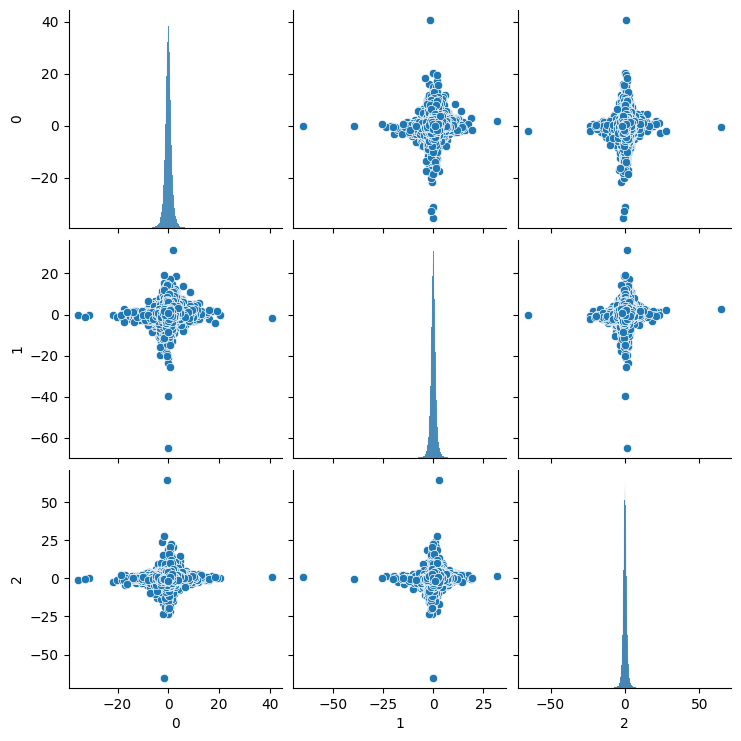

In [16]:
sns.pairplot(T.iloc[:,0:3])
plt.show()